<a href="https://colab.research.google.com/github/hernandemonteiro/fundamentus/blob/main/fundamentus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Buscando Dados**



In [195]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [196]:
def do_request(url):
  headers = {'User-Agent': 'Chrome/119.0.0.0'}
  response = requests.get(url, headers=headers)
  return response

def find_tables(url):
  response = do_request(url)
  soup = BeautifulSoup(response.content, "lxml")
  tables = soup.find_all('table')
  return tables

def save_html(url, filename):
  content = find_tables(url)
  if content:
   with open(f'{filename}.html', 'w', encoding='utf-8') as file:
      file.write(str(content).replace('?', ''))
      print('Conteúdo salvo com sucesso.')
  else:
    print('Nada encontrado.')

In [197]:
save_html("https://www.fundamentus.com.br/resultado.php", "fundamentus")
save_html("https://fundamentus.com.br/fii_resultado.php", "fundamentus_fiis.html")

Conteúdo salvo com sucesso.
Conteúdo salvo com sucesso.


In [198]:
fiis = pd.read_html("fundamentus_fiis.html", encoding="utf8")[0]

In [199]:
# helper para alterar e conseguir lidar com numeros no python

def replace_last_comma_with_dot(s):
    parts = s.rsplit(',', 1)
    if len(parts) == 2:
        return float(parts[0].replace('.', '') + '.' + parts[1])
    return float(s.replace(",", "."))

# **Analisando Ações**

In [200]:
stocks = pd.read_html("fundamentus.html", encoding='utf-8')[0]
print(stocks.shape)
stocks.head()

(987, 21)


,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
0,POPR4,1017,000,000,0000,"0,00%",0,000,000,000,...,000,"8,66%","5,65%",108,"15,25%","19,93%",000,"545.803.000,00",082,"30,93%"
1,CSTB3,15000,000,000,0000,"0,00%",0,000,000,000,...,000,"40,85%","28,98%",260,"22,40%","20,11%",000,"8.420.670.000,00",014,"31,91%"
2,PMET3,000,000,000,0000,"0,00%",0,000,000,000,...,000,"0,00%","0,00%",0,"0,00%","4,10%",000,"-290.863.000,00",000,"37,74%"
3,CSTB4,14769,000,000,0000,"0,00%",0,000,000,000,...,000,"40,85%","28,98%",260,"22,40%","20,11%",000,"8.420.670.000,00",014,"31,91%"
4,IVTT3,000,000,000,0000,"0,00%",0,000,000,000,...,000,"0,00%","0,00%",0,"0,00%","-0,40%",000,"1.083.050.000,00",000,"20,67%"


In [201]:
# remover as que não tem cotação e deixar cotação certo
stocks["Cotação"] = [None if int(replace_last_comma_with_dot(price)) < 1 else int(replace_last_comma_with_dot(price)) / 100 for price in stocks["Cotação"]]
stocks.dropna(subset=["Cotação"], inplace=True)

In [202]:
stocks["Div.Yield"] = [i.replace("%", "") for i in stocks["Div.Yield"]]
stocks["Div.Yield"] = [i.replace(".", "") for i in stocks["Div.Yield"]]
stocks["Div.Yield"] = [i.replace(",", ".") for i in stocks["Div.Yield"]]
stocks["Div.Yield"] = [float(i) for i in stocks["Div.Yield"]]

In [203]:
stocks.head()

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
0,POPR4,10.17,000,000,0000,0.0,0,000,000,000,...,000,"8,66%","5,65%",108,"15,25%","19,93%",000,"545.803.000,00",082,"30,93%"
1,CSTB3,150.00,000,000,0000,0.0,0,000,000,000,...,000,"40,85%","28,98%",260,"22,40%","20,11%",000,"8.420.670.000,00",014,"31,91%"
3,CSTB4,147.69,000,000,0000,0.0,0,000,000,000,...,000,"40,85%","28,98%",260,"22,40%","20,11%",000,"8.420.670.000,00",014,"31,91%"
6,MNSA4,0.47,000,000,0000,0.0,0,000,000,000,...,000,"-208,15%","-362,66%",363,"-13,50%","145,70%",000,"-9.105.000,00",-652,"-41,11%"
7,CFLU4,10.00,000,000,0000,0.0,0,000,000,000,...,000,"8,88%","10,72%",110,"17,68%","32,15%",000,"60.351.000,00",006,"8,14%"


## **Ações voltadas a dividendo**

In [204]:
stocks_dy = stocks
stocks_dy["Div.Yield"] = [i if i > 0 else None for i in stocks_dy["Div.Yield"]]
stocks_dy.dropna(subset=["Div.Yield"], inplace=True)

stocks_dy

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
11,GNDI3,66.95,"-3.584,82",584,3423,2.39,2378,7965,8705,-621,...,5088,"3,93%","-0,09%",117,"3,09%","-0,16%",000,"7.116.080.000,00",053,"25,23%"
28,LINX3,37.40,-9095,438,7885,1.52,2745,1196,5317,4706,...,2297,"14,83%","-8,67%",214,"6,82%","-4,81%",000,"1.619.010.000,00",022,"15,54%"
31,CALI3,26.00,-8369,398,1347,2.38,434,3904,-1917,-061,...,-3356,"-7,03%","-1,61%",107,"-2,39%","-4,76%",18333,"24.305.000,00",210,"94,53%"
44,NGRD3,0.83,-4634,044,0744,0.65,306,125,22769,342,...,196,"0,33%","-2,05%",260,"0,19%","-0,95%","666.067,00","448.125.000,00",005,"6,62%"
50,AURE3,12.27,-4173,100,1990,15.48,443,567,1396,-121,...,1034,"14,26%","-4,77%",168,"3,63%","-2,41%","65.438.300,00","12.223.500.000,00",053,"38,43%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,CRPG6,29.99,21462,128,1621,0.93,905,166,-1588,231,...,-2741,"-10,21%","0,76%",490,"-6,97%","0,60%","12.180,00","679.978.000,00",001,"-2,40%"
976,CRPG3,33.80,24189,144,1827,0.82,1019,187,-1789,260,...,-3142,"-10,21%","0,76%",490,"-6,97%","0,60%",000,"679.978.000,00",001,"-2,40%"
979,AESB3,11.39,49677,156,1974,0.66,351,-270,709,-060,...,863,"27,84%","4,91%",52,"5,53%","0,31%","54.332.900,00","4.394.450.000,00",262,"14,89%"
982,PDTC3,2.01,82338,115,0459,2.29,304,079,985,-1429,...,665,"4,66%","0,06%",217,"3,82%","0,14%","101.354,00","139.015.000,00",107,"-6,51%"


In [205]:
stocks_dy.sort_values(by="Div.Yield", ascending=False, inplace=True)

<Axes: >

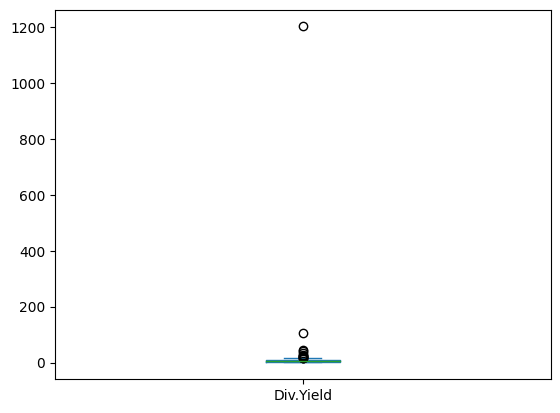

In [206]:
# verificando outliers
stocks_dy["Div.Yield"].plot(kind="box")

In [212]:
# limpando outliers
stocks_dy = stocks_dy[stocks_dy["Div.Yield"] < 30]

<Axes: >

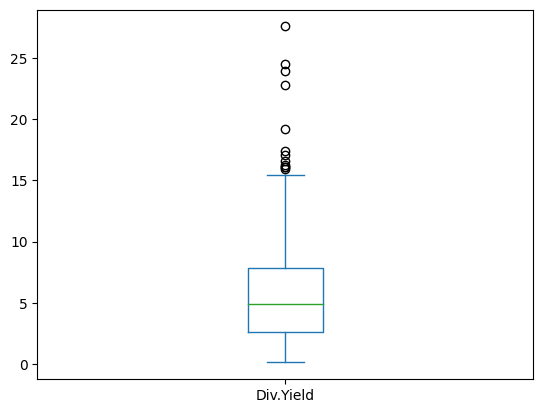

In [213]:
stocks_dy["Div.Yield"].plot(kind="box")

In [215]:
stocks_dy["Div.Yield"].describe()

count    306.000000
mean       5.755719
std        4.450343
min        0.110000
25%        2.615000
50%        4.880000
75%        7.847500
max       27.600000
Name: Div.Yield, dtype: float64

In [223]:
stocks_dy[["Papel", "Cotação", "Div.Yield", "P/L"]].sort_values(by="Div.Yield", ascending=False).head(20)

,Papel,Cotação,Div.Yield,P/L
490,ALLD3,7.35,27.60,440
612,EKTR4,39.55,24.57,797
536,LEVE3,32.14,23.95,571
607,EKTR3,38.69,22.84,780
626,VULC3,14.91,19.25,819
534,CSMG3,20.77,17.38,567
492,PETR4,37.71,17.06,447
511,MTRE3,3.53,16.62,514
503,BRAP4,18.26,16.26,488
500,PETR3,39.89,16.13,472


### **Análisando FIIs**

In [210]:
fiis.dropna(subset=["Cotação"], inplace=True)
fiis['Dividend Yield'] = [None if val == '-%' else val for val in fiis['Dividend Yield']]
fiis['Dividend Yield'] = [i.replace('%', '') if i != None else i for i in fiis['Dividend Yield']]

fiis["Pago por Dividendo"] = [None if dy is None or price is None
                               else str(round(replace_last_comma_with_dot(price) * (replace_last_comma_with_dot(dy) / 100), 2))
                                for dy, price in zip(fiis["Dividend Yield"], fiis["Cotação"])]

In [211]:
fiis

,Papel,Segmento,Cotação,FFO Yield,Dividend Yield,P/VP,Valor de Mercado,Liquidez,Qtd de imóveis,Preço do m2,Aluguel por m2,Cap Rate,Vacância Média,Pago por Dividendo
0,AAZQ11,Títulos e Val. Mob.,724,"20,79%","17,80",77,174.030.000,1.296.190,0,000,000,"0,00%","0,00%",128.87
1,ABCP11,Shoppings,6954,"9,88%","9,18",69,327.470.000,57.732,1,"4.576,69",56765,"12,40%","2,44%",638.38
2,AEFI11,Outros,17490,"8,78%","0,00",120,411.893.000,0,7,"4.312,36",39035,"9,05%","0,00%",0.0
3,AFCR11,NaN,10315,"7,43%","0,00",103,394.422.000,0,0,000,000,"0,00%","0,00%",0.0
4,AFHI11,Títulos e Val. Mob.,9690,"9,79%","12,52",101,387.305.000,1.556.520,0,000,000,"0,00%","0,00%",1213.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,YUFI11,Residencial,8984,"3,84%","3,60",85,44.259.700,4,40,"2.194,43",24060,"10,96%","0,00%",323.42
464,ZAGH11,Híbrido,12000,"4,11%","1,24",119,55.751.500,475,0,000,000,"0,00%","0,00%",148.8
465,ZAVC11,Títulos e Val. Mob.,1000,"0,16%","2,57",100,30.973.500,119.146,0,000,000,"0,00%","0,00%",25.7
466,ZAVI11,Híbrido,11230,"12,02%","13,03",85,131.764.000,468.595,11,"1.668,68",18528,"11,10%","0,63%",1463.27
